### MARKET BASKET ANALYSIS

#### The market basket analysis aims to identify products purchased together and to make predictionsn and recommendations based on the result of the analysis.

In [ ]:
#Importing the required libraries
import warnings
warnings.filterwarnings('ignore')
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('Required libaries imported')

Required libaries imported


In [ ]:
#importing files(dataset)
from google.colab import files
uploaded = files.upload()

Saving Market_Basket_Analysis-Groceries_dataset.csv to Market_Basket_Analysis-Groceries_dataset.csv


In [ ]:
# loading of the groceries dataset
grocery= pd.read_csv('Market_Basket_Analysis-Groceries_dataset.csv')

In [ ]:
# checking the first five rows
grocery.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
#checking to see if there are any nulls
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
#convert date as object to datetime
grocery['Date']= pd.to_datetime(grocery['Date'])

In [ ]:
#getting the info again to check if the  date column was converted to date time
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
#Just to confirm there are no null values
grocery.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
#Description of the dataset
grocery.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
#adding a new column that groups each transaction by member number and date to provide a list of products purchased in the same transaction.
grocery['single_trans'] =  grocery['Member_number'].astype(str)+'_'+grocery['Date'].astype(str)
grocery.head()

,Member_number,Date,itemDescription,single_trans
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-05-01,whole milk,2552_2015-05-01
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-01-02,whole milk,3037_2015-01-02


In [ ]:
#creating a basket matrix by grouping multiple items within the same order and then unstacking to transpose the itemDescription column to row level
bas = grocery.groupby(['single_trans', 'itemDescription']).sum().unstack().reset_index().fillna(0)

In [ ]:
bas.head()

single_trans         Member_number           \
itemDescription                  Instant food products UHT-milk   
0                1000_2014-06-24                   0.0      0.0   
1                1000_2015-03-15                   0.0      0.0   
2                1000_2015-05-27                   0.0      0.0   
3                1000_2015-07-24                   0.0      0.0   
4                1000_2015-11-25                   0.0      0.0   

                                                                       \
itemDescription abrasive cleaner artif. sweetener baby cosmetics bags   
0                            0.0              0.0            0.0  0.0   
1                            0.0              0.0            0.0  0.0   
2                            0.0              0.0            0.0  0.0   
3                            0.0              0.0            0.0  0.0   
4                            0.0              0.0            0.0  0.0   

                                                     ...                 \
itemDescription baking powder bathroom cleaner beef  ... turkey vinegar   
0                         0.0              0.0  0.0  ...    0.0     0.0   
1                         0.0              0.0  0.0  ...    0.0     0.0   
2                         0.0              0.0  0.0  ...    0.0     0.0   
3                         0.0              0.0  0.0  ...    0.0     0.0   
4                         0.0              0.0  0.0  ...    0.0     0.0   

                                                                          \
itemDescription waffles whipped/sour cream whisky white bread white wine   
0                   0.0                0.0    0.0         0.0        0.0   
1                   0.0                0.0    0.0         0.0        0.0   
2                   0.0                0.0    0.0         0.0        0.0   
3                   0.0                0.0    0.0         0.0        0.0   
4                   0.0                0.0    0.0         0.0        0.0   

                                             
itemDescription whole milk  yogurt zwieback  
0                   1000.0     0.0      0.0  
1                   1000.0  1000.0      0.0  
2                      0.0     0.0      0.0  
3                      0.0     0.0      0.0  
4                      0.0     0.0      0.0  

[5 rows x 168 columns]

In [ ]:
bas1 = pd.crosstab(grocery['single_trans'], grocery['itemDescription'])

In [ ]:
#encode function converts the collection of strings in the dataframe to bytes like 1s and 0s
#the values need to be encoded so the values in our matrix is 1’s and 0’s. This is done in the following manner:

#Set the value to 0 if it is less than or equal to 0.
#Set the value to 1 if it is greater than or equal to 1.

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_set= bas1.applymap(encode_units)

basket_set

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_trans,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# importing the apriori library from mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



In [ ]:
#compute frequent itemsets
frequent_itemsets = apriori(basket_set, min_support=0.005, use_colnames=True)

#compute standard metric
rules = association_rules(frequent_itemsets, metric="lift")
#rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)
rules.sort_values(by='zhangs_metric', ascending=False)
rules.head(8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
2,(whole milk),(canned beer),0.157923,0.046916,0.006015,0.038087,0.811821,-0.001394,0.990822,-0.215852
3,(canned beer),(whole milk),0.046916,0.157923,0.006015,0.128205,0.811821,-0.001394,0.965912,-0.195630
4,(whole milk),(citrus fruit),0.157923,0.053131,0.007151,0.045281,0.852259,-0.001240,0.991778,-0.170718
5,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748
6,(whole milk),(domestic eggs),0.157923,0.037091,0.005280,0.033432,0.901341,-0.000578,0.996214,-0.115033
7,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834,-0.102072


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

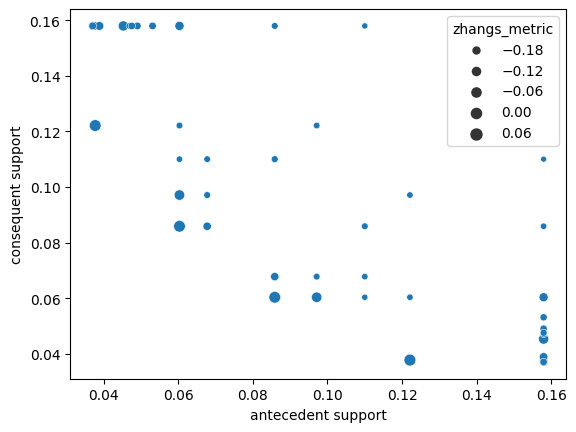

In [ ]:
#to identify the natural threshold for pruning
sns.scatterplot(x='antecedent support', y= 'consequent support', size='zhangs_metric', data=rules)

From the scatterplot visualization, it can be deduced that the highest degree of association in relation to zhangs metric as regards the consequent support
 and antecedent support of the variables are 0.06 and 0.12

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


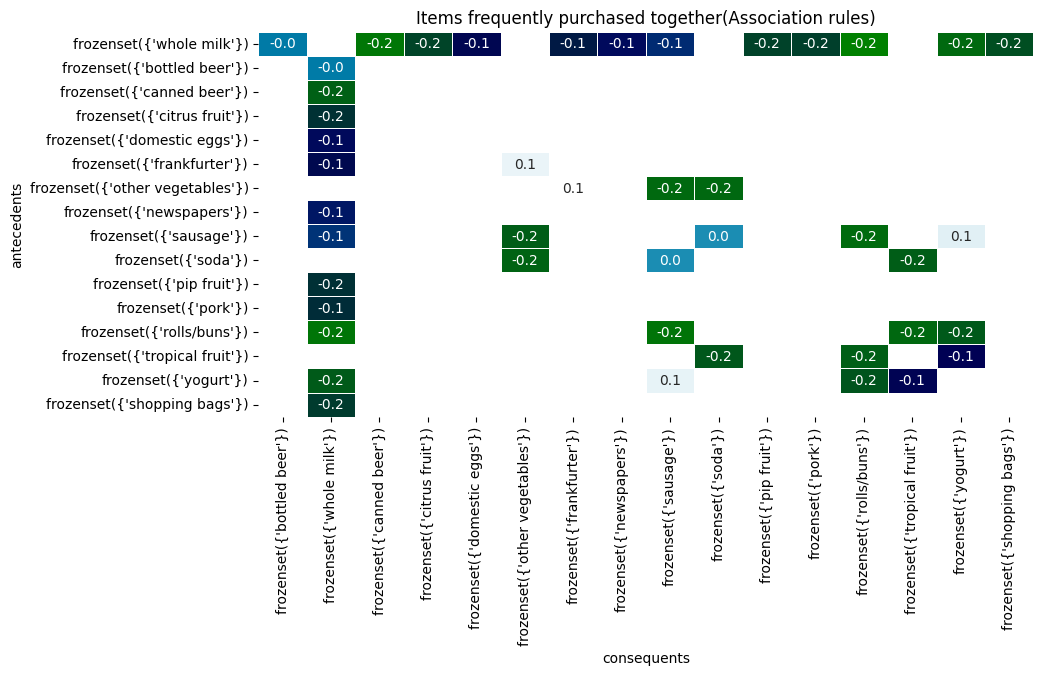

In [27]:
#Tranforming antecedent, consequent, and zhangs_metric into a matrix in preparation for heatmap chart
matrix= rules.pivot(index= 'antecedents', columns= 'consequents', values= 'zhangs_metric')

#generate heatmap
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cbar= False, cmap='ocean', fmt= '.1f', linewidths= .5)
plt.title('Items frequently purchased together(Association rules)')
plt.show()

 The occurence of negative zhangs values suggest a degree a dissociation between the items. While the positive zhangs values suggest a strong degree of
 association between the items and so it can be predicted that these items will likely be purchased together.
 for instance, sausage and yoghurt has a zhang metric of 0.1, which indicates a degree of association and so these items are predicted to be purchased in the future.
 While milk and citrus friut has a zhang metric of -0.2 and this indicates a degree of dissociation and this suggests these items will most likely not be purchased together.
